In [1]:
import os, re, numpy as np, pandas as pd, matplotlib.pyplot as plt
from tqdm import tqdm

## Here I am using a module nltk to list the stopwords

In [2]:
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
stopword_list
len(stopword_list)

179

### Setting the folder path and getting folder list

In [3]:
path = "C:/Users/Lenovo/Desktop/Python Data Science Course/47. Naive Bayes Project or Text Classification Project/data/20_newsgroups/"
folder_list = os.listdir(path)
folder_list, len(folder_list)

(['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc'],
 20)

### Constructing raw dictionary with key as word and value as it's count

In [4]:
word_dict = dict()
for folder in tqdm(folder_list, desc = "Progress"):
    files = os.listdir(path+folder)
    os.chdir(path+folder)
    for f in files:
        file_obj = open(f, 'r')
        file_data = file_obj.read()
        file_data = file_data.lower()
        file_data_list = re.split(r'\W+', file_data)
        for l in file_data_list:
            if (l not in stopword_list) and (len(l) > 2):
                if l in word_dict:
                    word_dict[l] += 1
                else:
                    word_dict[l] = 1

Progress: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [04:57<00:00, 14.85s/it]


In [5]:
word_dict

{'xref': 6064,
 'cantaloupe': 26048,
 'srv': 32359,
 'cmu': 52409,
 'edu': 164007,
 'alt': 7924,
 'atheism': 2563,
 '49960': 1,
 'moderated': 58,
 '713': 165,
 'news': 34309,
 'answers': 913,
 '7054': 2,
 '126': 59,
 'path': 20369,
 'crabapple': 6235,
 'bb3': 2436,
 'andrew': 4458,
 'sei': 6201,
 'cis': 5752,
 'ohio': 15887,
 'state': 18842,
 'magnus': 1340,
 'acs': 1888,
 'usenet': 8308,
 'ins': 1922,
 'cwru': 2732,
 'agate': 1827,
 'spool': 581,
 'uunet': 5369,
 'pipex': 759,
 'ibmpcug': 109,
 'mantis': 625,
 'mathew': 426,
 'newsgroups': 20404,
 'subject': 21589,
 'faq': 1065,
 'atheist': 406,
 'resources': 475,
 'summary': 983,
 'books': 950,
 'addresses': 242,
 'music': 481,
 'anything': 2528,
 'related': 712,
 'keywords': 1554,
 'fiction': 148,
 'contacts': 100,
 'message': 21954,
 '19930329115719': 2,
 'date': 20787,
 'mon': 1937,
 'mar': 144,
 '1993': 16588,
 'gmt': 17773,
 'expires': 161,
 'thu': 1930,
 'apr': 20510,
 'followup': 1485,
 'distribution': 4753,
 'world': 5354,
 '

## Sorting the above raw dictionary

In [6]:
word_dict_sorted = dict(sorted(word_dict.items(), key = lambda x:x[1], reverse = True))
word_dict_sorted

{'edu': 164007,
 'cmu': 52409,
 'com': 50158,
 'news': 34309,
 'srv': 32359,
 'cantaloupe': 26048,
 'net': 25459,
 'message': 21954,
 'subject': 21589,
 'lines': 20894,
 'date': 20787,
 'apr': 20510,
 'newsgroups': 20404,
 'path': 20369,
 'organization': 19840,
 'state': 18842,
 'gmt': 17773,
 '1993': 16588,
 'would': 15997,
 'ohio': 15887,
 'one': 15724,
 'writes': 14686,
 'article': 13435,
 'comp': 13101,
 'references': 12981,
 'talk': 12308,
 'misc': 11892,
 'ans': 11076,
 'sender': 11040,
 'howland': 10981,
 'reston': 10946,
 'people': 10364,
 'like': 10350,
 'university': 9958,
 'posting': 9793,
 'nntp': 9377,
 'mps': 9206,
 'know': 9173,
 'host': 8934,
 'sci': 8756,
 'get': 8670,
 'think': 8315,
 'usenet': 8308,
 'zaphod': 8302,
 'may': 8150,
 'alt': 7924,
 'politics': 7869,
 'windows': 7584,
 'also': 7561,
 'time': 7073,
 'rutgers': 7014,
 'use': 6959,
 'harvard': 6923,
 'eng': 6883,
 'near': 6868,
 'new': 6761,
 'rec': 6453,
 'good': 6308,
 'system': 6267,
 'crabapple': 6235,
 

### Preaparing variables for plotting the Graph to get the Idea which set of words to include in dictionary

In [7]:
wordlist = list(word_dict_sorted.keys())
freq = list(word_dict_sorted.values())

In [8]:
wordlen = np.arange(len(wordlist))

In [9]:
wordlen[0:100]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [10]:
freq[100:3000]

[4321,
 4317,
 4310,
 4307,
 4286,
 4283,
 4261,
 4241,
 4142,
 4140,
 3978,
 3958,
 3931,
 3926,
 3816,
 3815,
 3764,
 3758,
 3709,
 3699,
 3675,
 3620,
 3595,
 3578,
 3575,
 3525,
 3502,
 3479,
 3405,
 3366,
 3357,
 3345,
 3325,
 3307,
 3299,
 3290,
 3222,
 3217,
 3216,
 3200,
 3194,
 3185,
 3157,
 3150,
 3122,
 3071,
 3041,
 3041,
 3035,
 3016,
 2995,
 2992,
 2960,
 2939,
 2938,
 2931,
 2900,
 2899,
 2892,
 2859,
 2854,
 2850,
 2817,
 2805,
 2794,
 2778,
 2746,
 2740,
 2735,
 2732,
 2701,
 2700,
 2690,
 2684,
 2675,
 2670,
 2622,
 2616,
 2606,
 2600,
 2600,
 2588,
 2581,
 2575,
 2563,
 2532,
 2529,
 2528,
 2493,
 2477,
 2470,
 2462,
 2436,
 2405,
 2403,
 2400,
 2397,
 2386,
 2384,
 2374,
 2369,
 2356,
 2349,
 2337,
 2318,
 2314,
 2291,
 2283,
 2273,
 2272,
 2263,
 2260,
 2249,
 2247,
 2239,
 2237,
 2227,
 2224,
 2218,
 2215,
 2215,
 2196,
 2192,
 2183,
 2179,
 2173,
 2169,
 2154,
 2150,
 2146,
 2133,
 2130,
 2126,
 2114,
 2112,
 2109,
 2106,
 2100,
 2097,
 2093,
 2092,
 2082,
 2082,

In [11]:
x = wordlen[50:5000]
y = freq[50:5000]

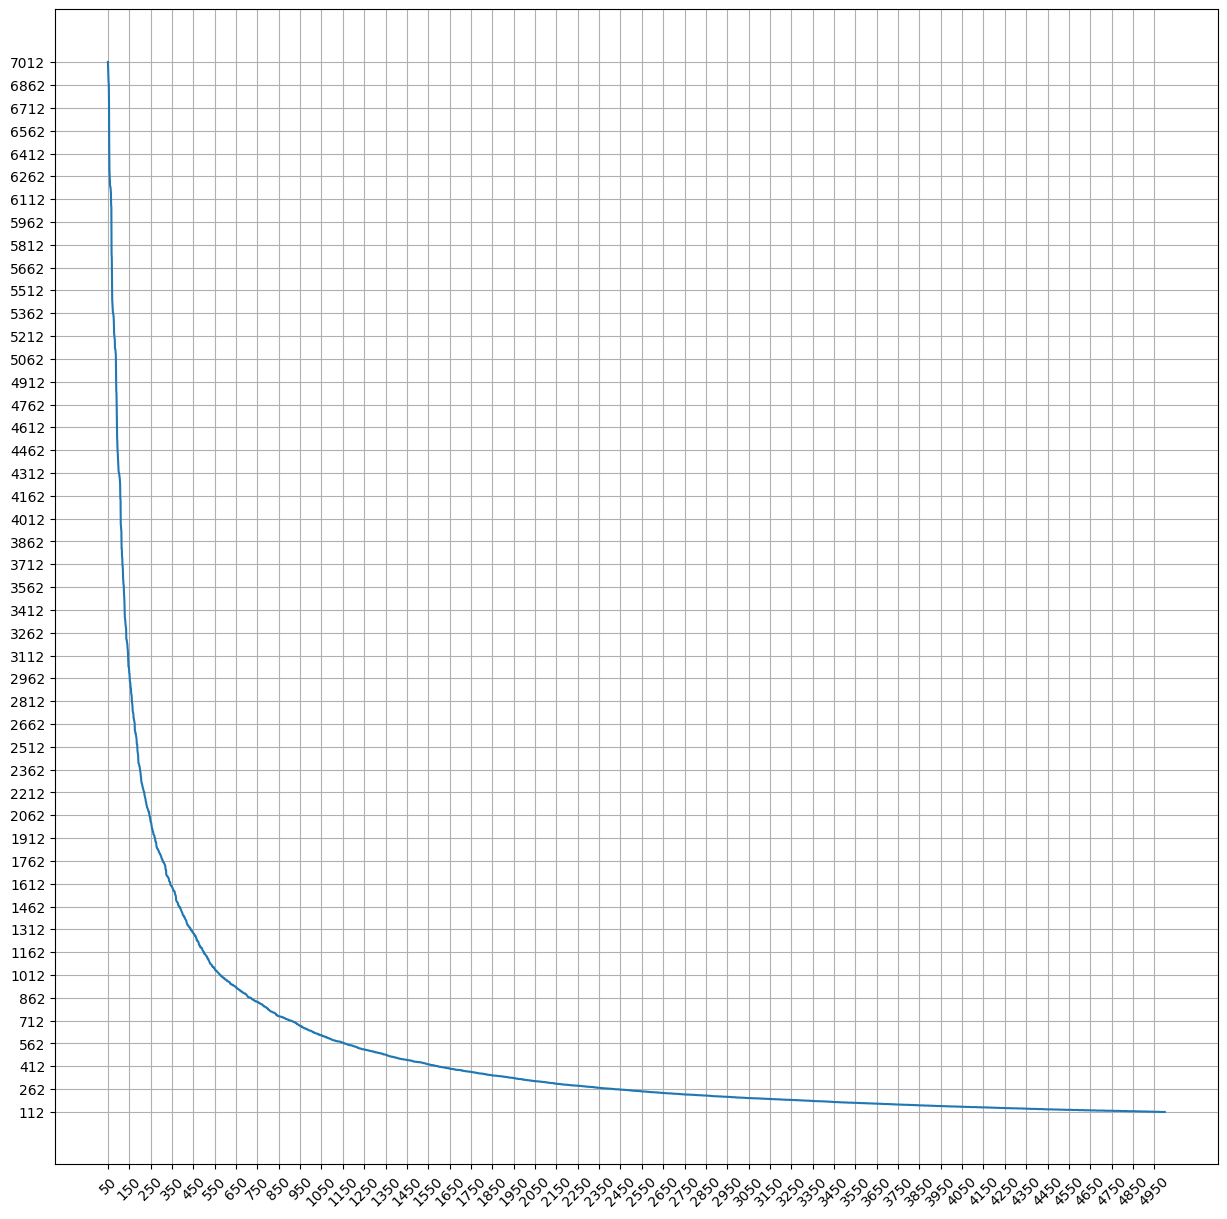

In [12]:
plt.figure(figsize=(15, 15))
plt.plot(x, y)
plt.grid()
plt.xticks(np.arange(min(x), max(x)+50, 100), rotation=45)
plt.yticks(np.arange(min(y), max(y)+50, 150))
plt.show()

### Taken exactly 4000 words as they seem to have reasonable frequency set

In [13]:
dictionary = wordlist[100:4100]
dictionary

['said',
 'ibm',
 'udel',
 'reply',
 'sun',
 'utexas',
 'used',
 'culture',
 'need',
 'sys',
 'uiuc',
 'work',
 'nasa',
 'really',
 'please',
 'something',
 'problem',
 'computer',
 'sura',
 'believe',
 'since',
 'graphics',
 'hardware',
 'still',
 'back',
 'mac',
 'netcom',
 'usa',
 'years',
 'going',
 'government',
 'information',
 'help',
 'find',
 'point',
 'take',
 'might',
 'file',
 'better',
 'year',
 'using',
 'question',
 'never',
 'last',
 'things',
 'read',
 'thanks',
 'software',
 'mit',
 'must',
 'david',
 'etc',
 'without',
 'cso',
 'uucp',
 'sure',
 'usc',
 'another',
 'made',
 'number',
 'someone',
 'access',
 'case',
 'forsale',
 'data',
 'look',
 'let',
 'got',
 'thing',
 'cwru',
 'long',
 'drive',
 'program',
 'bit',
 'fact',
 'part',
 'available',
 'version',
 'apple',
 'law',
 'guns',
 'day',
 'come',
 'science',
 'atheism',
 'john',
 'power',
 'anything',
 'little',
 'columbia',
 'around',
 'however',
 'bb3',
 'give',
 'darwin',
 'tue',
 'sport',
 'best',
 'every'

In [14]:
len(dictionary)

4000

# Preparing Data in the X*Y Format

In [15]:
def num_of_documents(path):
    folders = os.listdir(path)
    numOfDocs = 0
    for f in folders:
        numOfDocs += len(os.listdir(path+f))
    return numOfDocs

In [16]:
def datamatrix(path):
    numOfRows = num_of_documents(path)
    numOfCol = len(dictionary)

    xInput = np.zeros((numOfRows, numOfCol))
    yOutput = np.zeros(numOfRows)
    return xInput, yOutput

In [17]:
xtrain, ytrain = datamatrix(path)
print(xtrain.shape, ytrain.shape)

(19997, 4000) (19997,)


In [18]:
ytrain[6]

0.0

In [19]:
def data_preparation(path, dictionary):
    x, y = datamatrix(path)
    folders = os.listdir(path)
    rowIndex = 0
    folderNum = 0
    for folder in tqdm(folders, desc = "Progress"):
        docs = os.listdir(path + folder)
        os.chdir(path+folder)
        for doc in docs:
            file_obj = open(doc, 'r')
            file_data = file_obj.read()
            file_data = file_data.lower()
            file_data_list = re.split(r'\W+', file_data)
            for word in file_data_list:
                if word in dictionary:
                    colIndex = dictionary.index(word)
                    x[rowIndex, colIndex] += 1
            y[rowIndex] = folderNum
            rowIndex += 1
        folderNum += 1
    return x, y

# Preparing Training Data

In [20]:
xtrain, ytrain = data_preparation(path, dictionary)

Progress: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [13:34<00:00, 40.72s/it]


In [21]:
xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [22]:
ytrain

array([ 0.,  0.,  0., ..., 19., 19., 19.])

In [23]:
xtrain[0, :][0:500]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        1.,  4.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        4.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  3.,
        0.,  0.,  0.,  1.,  0.,  0., 18.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  4.,  0.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
        0.,  0.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
        1.,  0.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0

# Preparing Testing Data

In [24]:
testDataPath = "C:/Users/Lenovo/Desktop/Python Data Science Course/47. Naive Bayes Project or Text Classification Project/data/mini_newsgroups/"
xtest, ytest = data_preparation(testDataPath, dictionary)

Progress: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [01:41<00:00,  5.09s/it]


In [25]:
xtest

array([[ 0., 10.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
ytest

array([ 0.,  0.,  0., ..., 19., 19., 19.])

# Using Inbuilt Naive Bayes Classifier to Predict the Output

In [27]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain, ytrain)

MultinomialNB()

# Printing Score for Inbuilt Naive Bayes Classifier

In [28]:
clf.score(xtest, ytest)

0.89

# Multinomial Naive Bayes Implementation

In [29]:
def fit(x, y, word_dictionary):
    ''' Here it will return the dictionary'''
    result = dict()
    distinct_y = set(y)
    # ----Here we are storing the total count of the documents present----
    result["total_count"] = len(y)
    for d in distinct_y:
        result[d] = dict()
        nested_dict = result[d]
        # ----Here we are storing the number of individual class documents----
        nested_dict["class_count"] = (y==d).sum()
        total_words = 0
        for i in range(x.shape[-1]):
            value_feature_i = x[:, i]
            boolean_list = (y == d)
            value_feature_i_d = value_feature_i[boolean_list]
            total_words += value_feature_i_d.sum()
            # ----Here for each class we are storing it's feature as key and frequency as values----
            nested_dict[word_dictionary[i]] = value_feature_i_d.sum()
        nested_dict["total_words"] = total_words 
    return result

In [30]:
def prob_for_x(fit_dictionary, word_dictionary, x, current_class):
    output = np.log(fit_dictionary[current_class]['class_count']) - np.log(fit_dictionary['total_count'])
    
    for i in range(len(x)):
        # ----Here from testing documents we are ignoring the words who have frequency as 0-----
        if x[i] == 0:
            continue
        else:
            count_class_wi = fit_dictionary[current_class][word_dictionary[i]] + 1
        total_class_words = fit_dictionary[current_class]['total_words'] + len(word_dictionary)
        output = output + (np.log(count_class_wi) - np.log(total_class_words))
    
    return output

In [31]:
def probability_class(fit_dictionary, word_dictionary, x):
    best_class = -1
    all_class = fit_dictionary.keys()
    prob = -1000
    first_run = True
    for current_class in all_class:
        if current_class == 'total_count':
            continue
        
        temp_prob = prob_for_x(fit_dictionary, word_dictionary, x, current_class)
        if (first_run) or (temp_prob > prob):
            prob = temp_prob
            best_class = current_class
        first_run = False
    return best_class

In [32]:
def predict(fit_dictionary, word_dictionary, xtest):
    ypred = []
    for x in xtest:
        ypred.append(probability_class(fit_dictionary, word_dictionary, x))
    return ypred

In [33]:
fit_dictionary = fit(xtrain, ytrain, dictionary)
y_pred = predict(fit_dictionary, dictionary, xtest)

In [34]:
y_pred

[18.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 15.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 0.0,
 0.0,
 0.0,
 0.0,
 18.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 12.0,
 1.0,
 5.0,
 1.0,
 1.0,
 1.0,
 5.0,
 1.0,
 3.0,
 1.0,
 12.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 

# Printing the Average Accuracy of my own Naive Bayes Classifier

In [42]:
correct_pred = ((ytest - y_pred) == 0).sum()
print(correct_pred)

1781


In [43]:
wrong_pred = ((ytest - y_pred) != 0).sum()
print(wrong_pred)

219


In [44]:
total_test_docs = len(y_pred)
print(total_test_docs)

2000


In [47]:
 print("Average Accuracy is: ", correct_pred/total_test_docs)

Average Accuracy is:  0.8905


In [50]:
from sklearn.metrics import accuracy_score
print("Score : ", accuracy_score(ytest, y_pred))

Score :  0.8905


In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest, y_pred))

[[87  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2 10]
 [ 0 87  3  3  0  3  0  0  0  0  0  1  3  0  0  0  0  0  0  0]
 [ 0  6 73 12  0  3  2  1  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0 92  5  0  2  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  4 95  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  1  2  3 83  0  0  1  0  0  1  3  1  1  0  0  0  0  0]
 [ 0  0  0  0  1  0 98  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 97  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  1 98  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 98  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 97  0  0  1  0  0  0  0  1  0]
 [ 0  0  0  0  1  0  1  1  0  0  0 96  1  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  0  1  1  0  0  0  0 93  0  1  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  1  0  0  0  1 95  0  0  0  0  1  0]
 [ 1  2  1  0  1  1  0  0  1  0  0  1  0  0 92  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 99  0  0

# Point to note in confusion matrix

__First Point - is for majority of testing documents the minimum recall is 0.73 except the last class__<br>
__Second Point - It Seems like some significant part of the last class documents are predicted as first class__<br>
__Third Point - the majority of the classes are predicted pretty well upto 0.98 recall__

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_true = ytest, y_pred = y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81       100
         1.0       0.85      0.87      0.86       100
         2.0       0.94      0.73      0.82       100
         3.0       0.80      0.92      0.86       100
         4.0       0.88      0.95      0.91       100
         5.0       0.91      0.83      0.87       100
         6.0       0.92      0.98      0.95       100
         7.0       0.95      0.97      0.96       100
         8.0       0.93      0.98      0.96       100
         9.0       0.96      0.98      0.97       100
        10.0       0.98      0.97      0.97       100
        11.0       0.96      0.96      0.96       100
        12.0       0.85      0.93      0.89       100
        13.0       0.98      0.95      0.96       100
        14.0       0.96      0.92      0.94       100
        15.0       0.95      0.99      0.97       100
        16.0       0.82      0.89      0.86       100
        17.0       0.97    

# Observation

### The observation is that the score of inbuilt Naive Bayes Classifier and Own Implemented Naive Bayes are Same

# Rough Check

In [38]:
t = np.random.randint(10, size = (12,9))
t

array([[4, 0, 5, 3, 0, 2, 6, 2, 6],
       [9, 7, 8, 2, 3, 8, 1, 4, 0],
       [2, 0, 1, 1, 3, 8, 0, 6, 0],
       [4, 0, 0, 0, 8, 8, 1, 7, 1],
       [0, 7, 3, 5, 0, 6, 5, 3, 6],
       [7, 5, 5, 0, 0, 0, 9, 0, 0],
       [3, 2, 4, 4, 6, 4, 0, 0, 3],
       [3, 0, 4, 0, 6, 8, 4, 0, 9],
       [6, 7, 3, 0, 2, 8, 3, 4, 4],
       [0, 8, 1, 1, 9, 5, 5, 4, 1],
       [5, 7, 3, 3, 4, 0, 6, 6, 9],
       [5, 2, 0, 9, 0, 9, 9, 4, 2]])

In [39]:
bool_arr = [False,False,False,True,False,True,False,False,True,False,True,False]
t_words_count = 0
for i in range(t.shape[-1]):
    t_i = t[:, i]
    t_i_d = t_i[bool_arr]
    print(t_i_d)
    print(t_i_d.sum())
    t_words_count += t_i_d.sum()
    print(t_words_count)

[4 7 6 5]
22
22
[0 5 7 7]
19
41
[0 5 3 3]
11
52
[0 0 0 3]
3
55
[8 0 2 4]
14
69
[8 0 8 0]
16
85
[1 9 3 6]
19
104
[7 0 4 6]
17
121
[1 0 4 9]
14
135


In [40]:
for i in t:
    print(i)

[4 0 5 3 0 2 6 2 6]
[9 7 8 2 3 8 1 4 0]
[2 0 1 1 3 8 0 6 0]
[4 0 0 0 8 8 1 7 1]
[0 7 3 5 0 6 5 3 6]
[7 5 5 0 0 0 9 0 0]
[3 2 4 4 6 4 0 0 3]
[3 0 4 0 6 8 4 0 9]
[6 7 3 0 2 8 3 4 4]
[0 8 1 1 9 5 5 4 1]
[5 7 3 3 4 0 6 6 9]
[5 2 0 9 0 9 9 4 2]
